In [26]:
import json

# Load the JSON file
with open('c3o_TVAE_grep.json', 'r') as f:
    data = json.load(f)

# Extract the score and configuration for each configuration
scores = [config['score'] for config in data]
configurations = [config['combination'] for config in data]

# Sort the configurations by score in descending order
sorted_scores = sorted(scores, reverse=True)
sorted_configurations = [configurations[scores.index(score)] for score in sorted_scores]

# Get the top 10 configurations with the highest score
top_ten_sorted_scores = sorted_scores[:10]
top_10_configurations = sorted_configurations[:10]

# Print top 10 scores
print('Top 10 scores:')
for i, score in enumerate(top_ten_sorted_scores):
    print(score)
print()

# Print the top 10 configurations
for i, configuration in enumerate(top_10_configurations):
    print(f"Top {i+1} configuration:")
    for key, value in configuration.items():
        print(f"{key}: {value}")
    print()

Top 10 scores:
0.9460239012300666
0.9420586913796035
0.9419633434886339
0.9412562698682962
0.9412249148288127
0.9410645542508382
0.9410273558409421
0.9402937162515737
0.9400269828664797
0.9397121270176194

Top 1 configuration:
enforce_min_max_values: True
enforce_rounding: True
epochs: 1000
batch_size: 500
compress_dims: [64, 64]
decompress_dims: [256, 256]
embedding_dim: 128
l2scale: 0.001
loss_factor: 5

Top 2 configuration:
enforce_min_max_values: True
enforce_rounding: True
epochs: 1000
batch_size: 200
compress_dims: [128, 128]
decompress_dims: [128, 128]
embedding_dim: 256
l2scale: 1e-05
loss_factor: 5

Top 3 configuration:
enforce_min_max_values: True
enforce_rounding: True
epochs: 1500
batch_size: 500
compress_dims: [128, 128]
decompress_dims: [256, 256]
embedding_dim: 256
l2scale: 0.0001
loss_factor: 2

Top 4 configuration:
enforce_min_max_values: True
enforce_rounding: True
epochs: 1500
batch_size: 200
compress_dims: [256, 256]
decompress_dims: [256, 256]
embedding_dim: 64
l2s

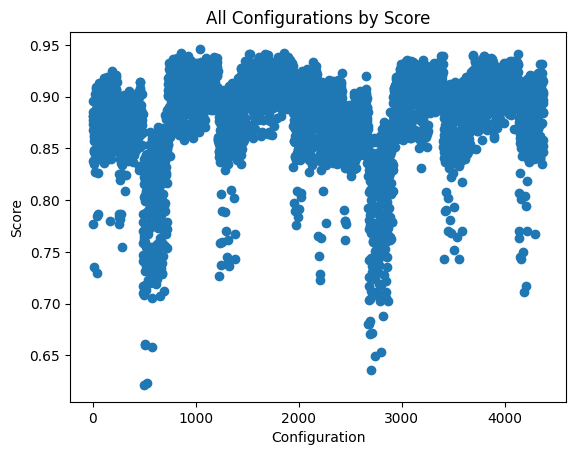

In [27]:
import matplotlib.pyplot as plt

# Plot the scores as a scatter plot
plt.scatter(range(len(scores)), scores)
plt.xlabel('Configuration')
plt.ylabel('Score')
plt.title('All Configurations by Score')
plt.show()

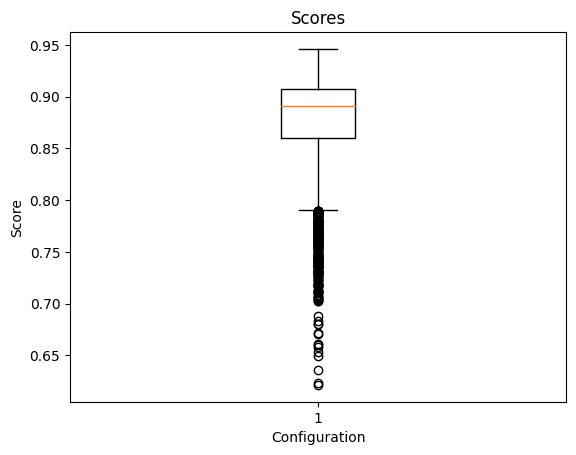

In [28]:
import matplotlib.pyplot as plt

# Create a box plot
plt.boxplot(scores)

# Set the title and axis labels
plt.title('Scores')
plt.xlabel('Configuration')
plt.ylabel('Score')

# Show the plot
plt.show()

In [24]:
print(top_10_configurations) 

[{'enforce_min_max_values': True, 'enforce_rounding': True, 'epochs': 1000, 'batch_size': 500, 'compress_dims': [64, 64], 'decompress_dims': [256, 256], 'embedding_dim': 128, 'l2scale': 0.001, 'loss_factor': 5}, {'enforce_min_max_values': True, 'enforce_rounding': True, 'epochs': 1000, 'batch_size': 200, 'compress_dims': [128, 128], 'decompress_dims': [128, 128], 'embedding_dim': 256, 'l2scale': 1e-05, 'loss_factor': 5}, {'enforce_min_max_values': True, 'enforce_rounding': True, 'epochs': 1500, 'batch_size': 500, 'compress_dims': [128, 128], 'decompress_dims': [256, 256], 'embedding_dim': 256, 'l2scale': 0.0001, 'loss_factor': 2}, {'enforce_min_max_values': True, 'enforce_rounding': True, 'epochs': 1500, 'batch_size': 200, 'compress_dims': [256, 256], 'decompress_dims': [256, 256], 'embedding_dim': 64, 'l2scale': 1e-05, 'loss_factor': 1}, {'enforce_min_max_values': True, 'enforce_rounding': True, 'epochs': 1500, 'batch_size': 200, 'compress_dims': [64, 64], 'decompress_dims': [256, 256

In [32]:
import seaborn as sns

# Transfrom to 2d array
top_10_configurations_2d = []
for item in top_10_configurations:
    row = []
    row.append(item['enforce_min_max_values'])
    row.append(item['enforce_rounding'])
    row.append(item['epochs'])
    row.append(item['batch_size'])
    row.extend(item['compress_dims'])
    row.extend(item['decompress_dims'])
    row.append(item['embedding_dim'])
    row.append(item['l2scale'])
    row.append(item['loss_factor'])
    top_10_configurations_2d.append(row)

print(top_10_configurations_2d)


[[True, True, 1000, 500, 64, 64, 256, 256, 128, 0.001, 5], [True, True, 1000, 200, 128, 128, 128, 128, 256, 1e-05, 5], [True, True, 1500, 500, 128, 128, 256, 256, 256, 0.0001, 2], [True, True, 1500, 200, 256, 256, 256, 256, 64, 1e-05, 1], [True, True, 1500, 200, 64, 64, 256, 256, 64, 0.001, 2], [True, True, 1500, 200, 64, 64, 256, 256, 128, 0.001, 2], [False, True, 1500, 500, 256, 256, 256, 256, 256, 0.001, 2], [True, True, 1500, 200, 256, 256, 256, 256, 256, 0.001, 2], [False, True, 1500, 200, 64, 64, 128, 128, 256, 1e-05, 2], [True, True, 1500, 200, 256, 256, 256, 256, 256, 0.0001, 2]]


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convert data to a numpy array
top_10_configurations_2d_np = np.array(top_10_configurations_2d)

# Column names
column_names = ['enforce_min_max_values', 'enforce_rounding', 'epochs', 'batch_size', 'compress_dims_1', 'compress_dims_2', 'decompress_dims_1', 'decompress_dims_2', 'embedding_dim', 'l2scale', 'loss_factor']

# Create a copy of the data array to modify the 'l2scale' column
top_10_configurations_2d_np_mod = np.copy(top_10_configurations_2d_np)

# Format 'l2scale' column to show in "1e-xx" format
top_10_configurations_2d_np_mod[:, column_names.index('l2scale')] = ["{:.0e}".format(x) for x in top_10_configurations_2d_np_mod[:, column_names.index('l2scale')]]

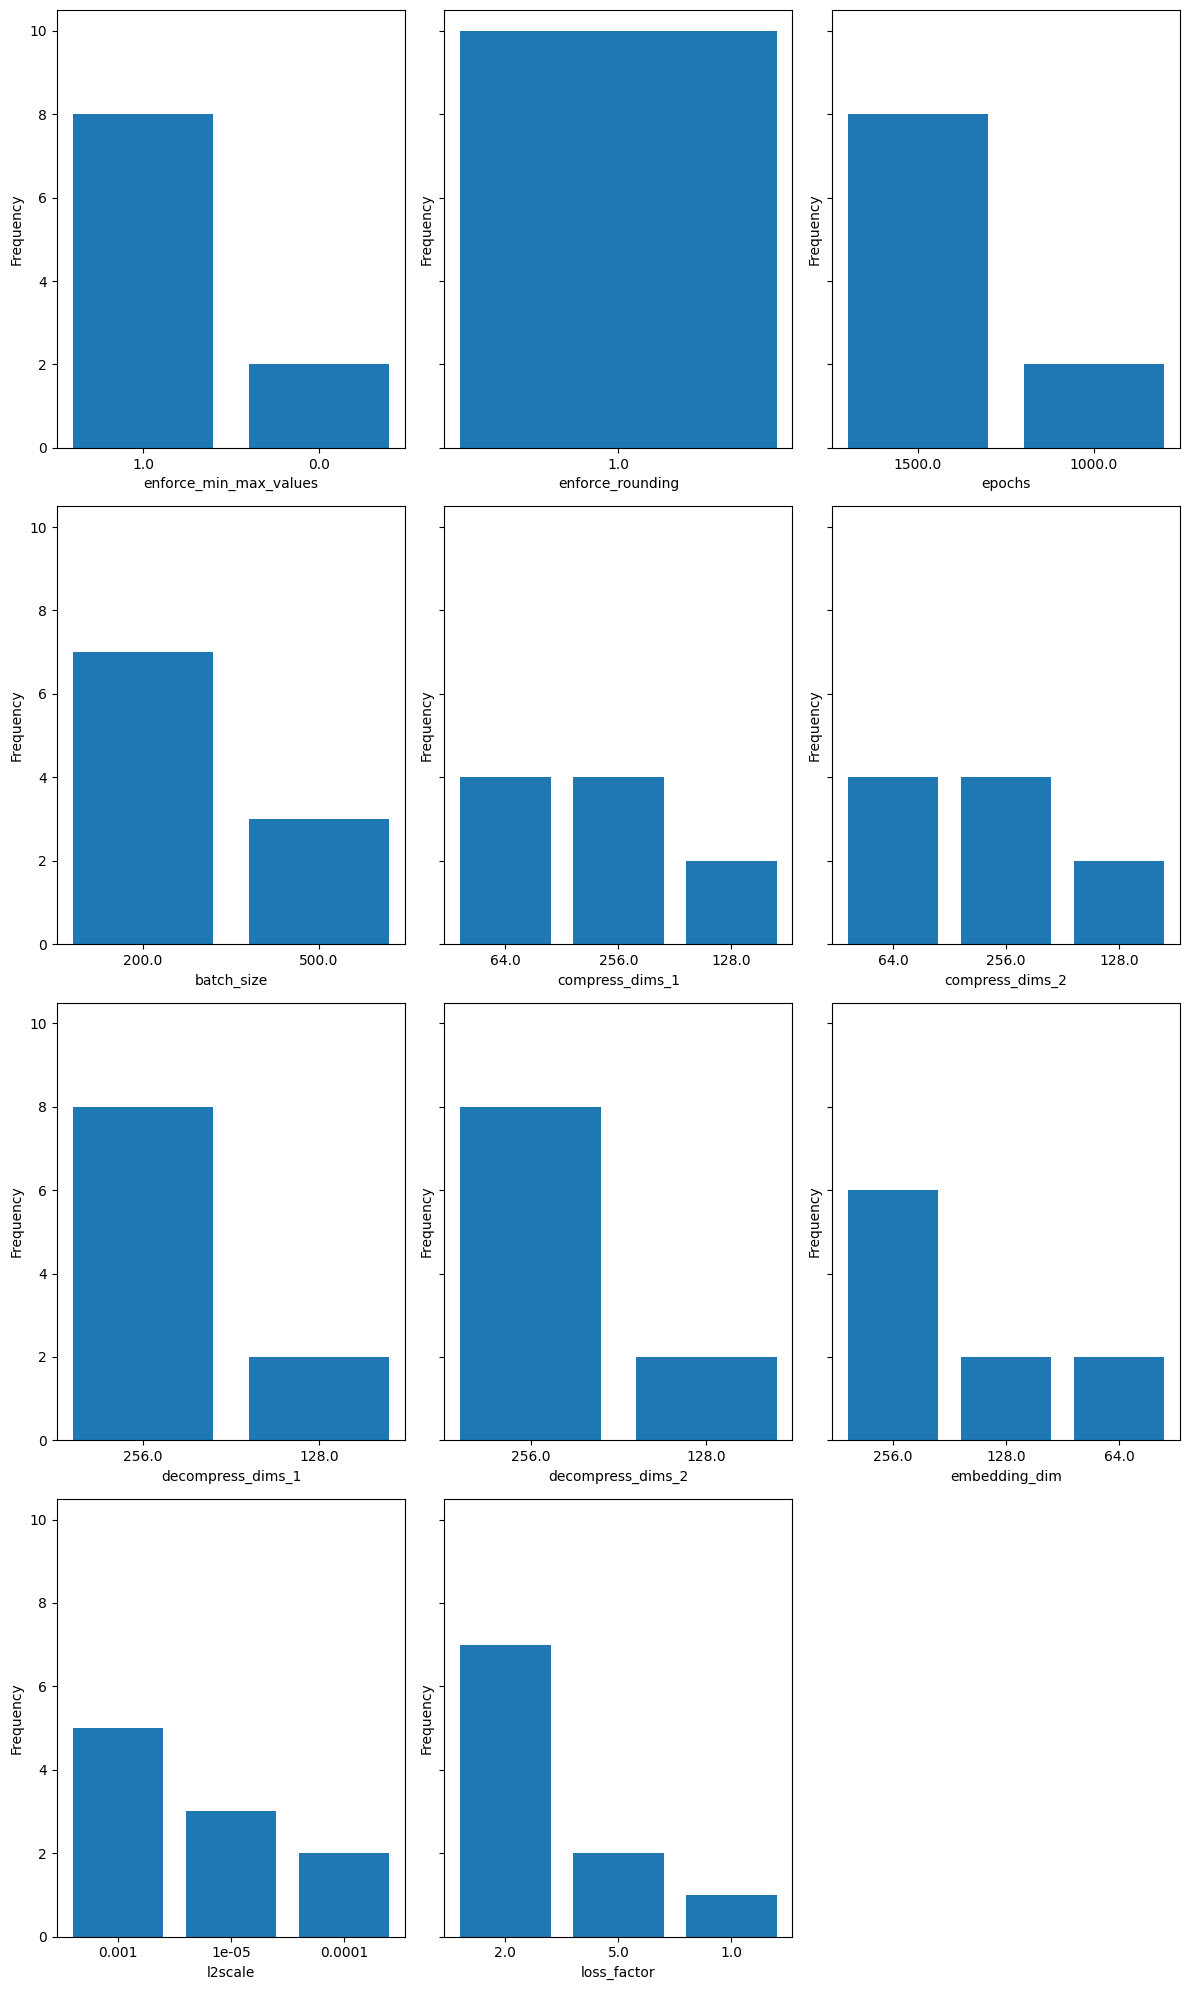

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Column names
column_names = ['enforce_min_max_values', 'enforce_rounding', 'epochs', 'batch_size', 'compress_dims_1', 'compress_dims_2', 'decompress_dims_1', 'decompress_dims_2', 'embedding_dim', 'l2scale', 'loss_factor']

# Convert data to a pandas DataFrame
df = pd.DataFrame(top_10_configurations_2d_np_mod, columns=column_names)

# Calculate the number of rows and columns for subplots
n_columns = 3
n_rows = int(np.ceil(len(column_names) / n_columns))

# Create subplots
fig, axs = plt.subplots(n_rows, n_columns, figsize=(12, 5 * n_rows), sharey=True)

# Flatten the axs array if necessary
if n_rows > 1:
    axs = axs.flatten()

# Plot the frequency of unique values for each column
for i, col in enumerate(column_names):
    value_counts = df[col].value_counts()
    axs[i].bar(value_counts.index.astype(str), value_counts.values)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

# Hide unused subplots if any
if len(column_names) < len(axs):
    for j in range(len(column_names), len(axs)):
        axs[j].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
